In [6]:
#Loading necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
import graphviz
import seaborn as sn
import pydotplus


In [7]:
#Loading data
df=pd.read_csv("C://Users//user//Downloads//car_data.csv")
print(df.dtypes)
print("Shape of dataframe is:",df.shape)
df.head()

buying            object
maintenance       object
doors             object
persons           object
lug_boot          object
safety            object
car_evaluation    object
dtype: object
Shape of dataframe is: (1728, 7)


,buying,maintenance,doors,persons,lug_boot,safety,car_evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Converting string values into numerical values.
cleanup={"car_evaluation":{"unacc":4,"acc":3,"good":2,"vgood":1}}
df.replace(cleanup,inplace=True)
X=df.drop('car_evaluation',axis=1)
y=df['car_evaluation']
X=pd.get_dummies(X)

In [10]:
#Spliting data into training and testing data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
#Size of Training and Test data set
print("Size of X_train is: ",X_train.shape)
print("Size of X_test is: ",X_test.shape)

Size of X_train is:  (1382, 21)
Size of X_test is:  (346, 21)


In [11]:
#Training decision tree model
dt_clf=DecisionTreeClassifier(ccp_alpha=0.0025)

In [12]:
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Micro Precision: ", precision_score(y_test,y_pred,average='micro'))
print("Micro Recall: ", recall_score(y_test,y_pred,average='micro'))

Accuracy Score:  0.9508670520231214
Micro Precision:  0.9508670520231214
Micro Recall:  0.9508670520231214


In [13]:
#Visualizing Decision Tree
dot_data=export_graphviz(dt_clf,out_file=None,feature_names=X_train.columns,class_names=['unacc','acc','good','vgood'],filled=True,rounded=True,special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10, 20!"')
graph=graphviz.Source(pydot_graph.to_string())
graph

NameError: name 'pydotplus' is not defined

In [14]:
cm=confusion_matrix(y_test,y_pred)

In [10]:
#Visualizing Confusion Matrix Updated
def visualize_confusion_matrix(cm):    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title("Confusion Matrix")
    sn.heatmap(cm,annot=True,cmap="YlGnBu",ax=ax)
    ax.set_xticklabels(['vgood','good','acc','unacc'])
    ax.set_yticklabels(['vgood','good','acc','unacc'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel("Actual")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

In [15]:
visualize_confusion_matrix(cm)

NameError: name 'visualize_confusion_matrix' is not defined

In [12]:
#Calculating important Values like TP,FP,TN,FN, sensitivity and specificity
def confusion_matrix_table(cm):    
    vgoodTP=cm[0,0]
    vgoodFP=cm[1,0]+cm[2,0]+cm[3,0]
    vgoodTN=cm[1,1]+cm[1,2]+cm[1,3]+cm[2,1]+cm[2,2]+cm[2,3]+cm[3,1]+cm[3,2]+cm[3,3]
    vgoodFN=cm[0,1]+cm[0,2]+cm[0,3]
    vgoodP=vgoodTP+vgoodFP
    vgoodN=vgoodTN+vgoodFN
    vgoodAccuracy=(vgoodTP+vgoodTN)/(vgoodP+vgoodN)
    vgoodError=(vgoodFP+vgoodFN)/(vgoodP+vgoodN)
    vgoodSensitivity=vgoodTP/(vgoodTP+vgoodFN)
    vgoodSpecificity=vgoodTN/(vgoodTN+vgoodFP)

    goodTP=cm[1,1]
    goodFP=cm[0,1]+cm[2,1]+cm[3,1]
    goodTN=cm[0,0]+cm[0,2]+cm[0,3]+cm[2,0]+cm[2,2]+cm[2,3]+cm[3,0]+cm[3,2]+cm[3,3]
    goodFN=cm[1,0]+cm[1,2]+cm[1,3]
    goodP=goodTP+goodFP
    goodN=goodTN+goodFN
    goodAccuracy=(goodTP+goodTN)/(goodP+goodN)
    goodError=(goodFP+goodFN)/(goodP+goodN)
    goodSensitivity=goodTP/(goodTP+goodFN)
    goodSpecificity=goodTN/(goodTN+goodFP)

    accTP=cm[2,2]
    accFP=cm[0,2]+cm[1,2]+cm[3,2]
    accTN=cm[0,0]+cm[0,1]+cm[0,3]+cm[1,0]+cm[1,1]+cm[1,3]+cm[3,0]+cm[3,1]+cm[3,3]
    accFN=cm[2,0]+cm[2,1]+cm[2,3]
    accP=accTP+accFP
    accN=accTN+accFN
    accAccuracy=(accTP+accTN)/(accP+accN)
    accError=(accFP+accFN)/(accP+accN)
    accSensitivity=accTP/(accTP+accFN)
    accSpecificity=accTN/(accTN+accFP)

    unaccTP=cm[3,3]
    unaccFP=cm[0,3]+cm[1,3]+cm[2,3]
    unaccTN=cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]
    unaccFN=cm[0,3]+cm[1,3]+cm[2,3]
    unaccP=unaccTP+unaccFP
    unaccN=unaccTN+unaccFN
    unaccAccuracy=(unaccTP+unaccTN)/(unaccP+unaccN)
    unaccError=(unaccFP+unaccFN)/(unaccP+unaccN)
    unaccSensitivity=unaccTP/(unaccTP+unaccFN)
    unaccSpecificity=unaccTN/(unaccTN+unaccFP)

    matrix_data={'Car_Evaluation':['vgood','good','acc','unacc'],
                'TP':[vgoodTP,goodTP,accTP,unaccTP],
                'FP':[vgoodFP,goodFP,accFP,unaccFP],
                'TN':[vgoodTN,goodTN,accTN,unaccTN],
                'FN':[vgoodFN,goodFN,accFN,unaccTN],
                'P':[vgoodP,goodP,accP,unaccP],
                'N':[vgoodN,goodN,accN,unaccN],
                'Accuracy':[vgoodAccuracy,goodAccuracy,accAccuracy,unaccAccuracy],
                'Error':[vgoodError,goodError,accError,unaccError],
                'Sensitivity':[vgoodSensitivity,goodSensitivity,accSensitivity,unaccSensitivity],
                'Specificity':[vgoodSpecificity,goodSpecificity,accSpecificity,unaccSpecificity]}
    matrix_data_df=pd.DataFrame(matrix_data)
    matrix_data_df.set_index('Car_Evaluation',inplace=True)
    return(matrix_data_df)

In [13]:
confusion_matrix_table(cm)

,TP,FP,TN,FN,P,N,Accuracy,Error,Sensitivity,Specificity
Car_Evaluation,,,,,,,,,,
vgood,13,2,331,0,15,331,0.994220,0.005780,1.000000,0.993994
good,13,2,330,1,15,331,0.991329,0.008671,0.928571,0.993976
acc,54,11,276,5,65,281,0.953757,0.046243,0.915254,0.961672
unacc,249,2,84,84,251,86,0.988131,0.011869,0.992032,0.976744


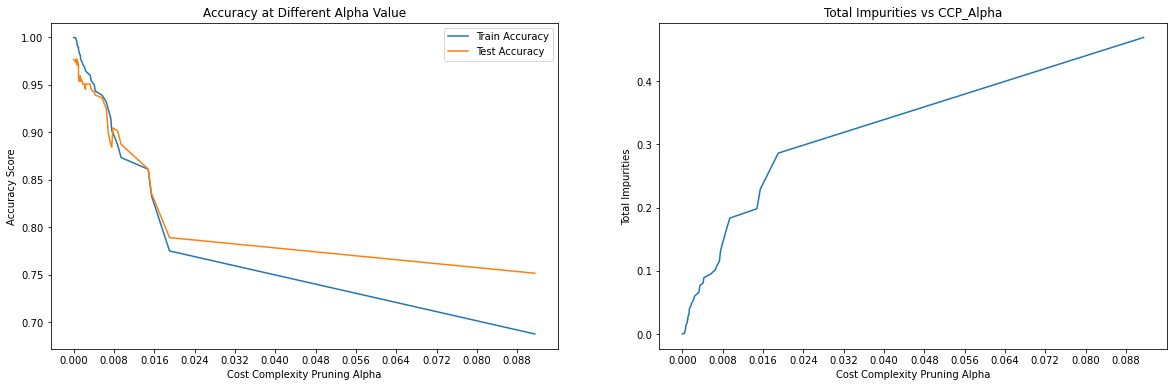

In [14]:
#Finding out cost complexity pruning alphas for best test accuracy(reducing overfiting)
path=dt_clf.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

accuracy_train,accuracy_test=[],[]
for i in alphas:
    dt_clf=DecisionTreeClassifier(ccp_alpha=i)
    dt_clf.fit(X_train,y_train)
    y_train_pred=dt_clf.predict(X_train)
    y_test_pred=dt_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

fig,ax=plt.subplots(1,2,figsize=(20,6))
sn.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy",ax=ax[0])
ax[0].set_title("Accuracy at Different Alpha Value")
sn.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy",ax=ax[0])
ax[0].set_xticks(ticks=np.arange(0.0,0.095,0.008))
ax[0].set_xlabel("Cost Complexity Pruning Alpha")
ax[0].set_ylabel("Accuracy Score")

impurities=path['impurities']
sn.lineplot(x=alphas,y=impurities,ax=ax[1])
ax[1].set_xticks(ticks=np.arange(0.0,0.095,0.008))
ax[1].set_ylabel("Total Impurities")
ax[1].set_xlabel("Cost Complexity Pruning Alpha")
ax[1].set_title("Total Impurities vs CCP_Alpha");

In [16]:
#Building final tree

dt_clf=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0009)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0009)

In [16]:
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Micro Precision: ", precision_score(y_test,y_pred,average='micro'))
print("Micro Recall: ", recall_score(y_test,y_pred,average='micro'))

Accuracy Score:  0.976878612716763
Micro Precision:  0.976878612716763
Micro Recall:  0.976878612716763


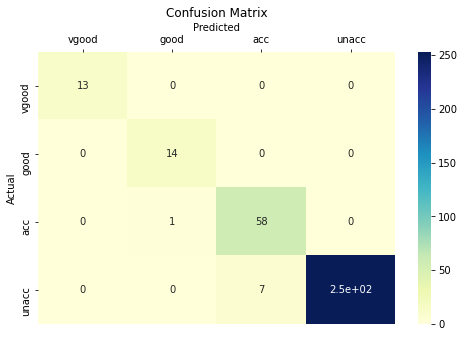

In [17]:
#Visualizing Confusion Matrix Updated
cm=confusion_matrix(y_test,y_pred)
visualize_confusion_matrix(cm)

In [18]:
#Calculating important Values like TP,FP,TN,FN, sensitivity and specificity
confusion_matrix_table(cm)

,TP,FP,TN,FN,P,N,Accuracy,Error,Sensitivity,Specificity
Car_Evaluation,,,,,,,,,,
vgood,13,0,333,0,13,333,1.000000,0.000000,1.000000,1.000000
good,14,1,331,0,15,331,0.997110,0.002890,1.000000,0.996988
acc,58,7,280,1,65,281,0.976879,0.023121,0.983051,0.975610
unacc,253,0,86,86,253,86,1.000000,0.000000,1.000000,1.000000


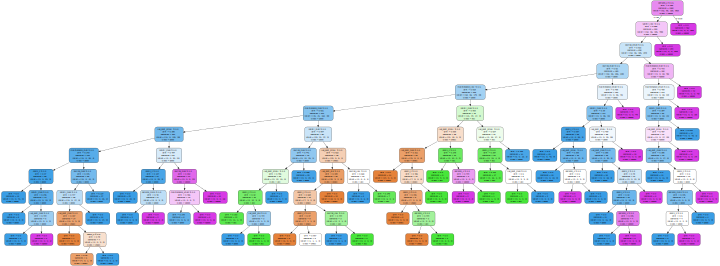

In [19]:
#Visualizing Decision Tree Updated
dot_data=export_graphviz(dt_clf,out_file=None,feature_names=X_train.columns,class_names=['unacc','acc','good','vgood'],filled=True,rounded=True,special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
graph=graphviz.Source(pydot_graph.to_string())
graph

# Confusion Matrix with KFold Validation and CART Algorithm

In [19]:
#Initialize array to store confusion matrix
def kfold_cm(clf,splits):    
    kf=KFold(n_splits=splits,shuffle=True)
    cm_array=[[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
    for train_index, test_index in kf.split(X,y):
        X_train, X_test, y_train, y_test= X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        model=clf.fit(X_train, y_train)
        y_predict=model.predict(X_test)
        c=confusion_matrix(y_test,y_predict)
        cm_array=cm_array+c
    combined_cm=pd.DataFrame(cm_array)
    return combined_cm

In [17]:
#Visualize Confusion Matrix
clf=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0009)
combined_cm=kfold_cm(clf,10)
visualize_confusion_matrix(combined_cm)

NameError: name 'kfold_cm' is not defined

In [18]:
confusion_matrix_table(np.asmatrix(combined_cm))

NameError: name 'confusion_matrix_table' is not defined

# Confusion Matrix with KFold Validation and Bagging Algorithm

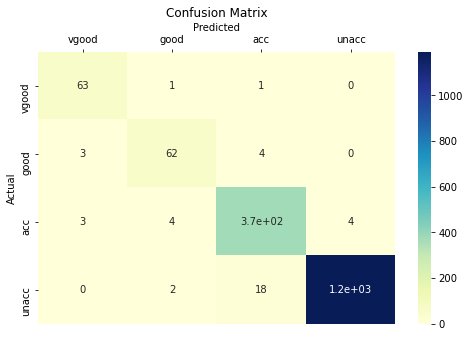

In [23]:
clf_bagging=BaggingClassifier()
bagging_cm=kfold_cm(clf_bagging,10)
visualize_confusion_matrix(bagging_cm)

In [24]:
confusion_matrix_table(np.asmatrix(bagging_cm))

,TP,FP,TN,FN,P,N,Accuracy,Error,Sensitivity,Specificity
Car_Evaluation,,,,,,,,,,
vgood,63,6,1657,2,69,1659,0.995370,0.004630,0.969231,0.996392
good,62,7,1652,7,69,1659,0.991898,0.008102,0.898551,0.995781
acc,373,23,1321,11,396,1332,0.980324,0.019676,0.971354,0.982887
unacc,1190,4,514,514,1194,518,0.995327,0.004673,0.996650,0.992278


# Confusion Matrix with KFold Validation and Boosting Algorithm

In [28]:
clf_boosting=GradientBoostingClassifier()
boosting_cm=kfold_cm(clf_boosting,10)
visualize_confusion_matrix(boosting_cm)

NameError: name 'visualize_confusion_matrix' is not defined

In [29]:
confusion_matrix_table(np.asmatrix(boosting_cm))

NameError: name 'confusion_matrix_table' is not defined

# Confusion Matrix with KFold Validation and Random Forest

In [30]:
clf_random_forest=RandomForestClassifier()
random_forest_cm=kfold_cm(clf_random_forest,10)
visualize_confusion_matrix(random_forest_cm)

NameError: name 'visualize_confusion_matrix' is not defined

In [31]:
confusion_matrix_table(np.asmatrix(random_forest_cm))

NameError: name 'confusion_matrix_table' is not defined